<a href="https://colab.research.google.com/github/JanethGrimaldo/MC/blob/main/ANALISIS_ESTADISTICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISIS ESTADÍSTICO**
---


## Importación de bibliotecas y carga de la base de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style="whitegrid")
uploaded = files.upload()
df = pd.read_excel('Base de datos PIA.xlsx')
df.head()

Saving Base de datos PIA.xlsx to Base de datos PIA.xlsx


,fecha_nacimiento,edad,sexo,IDESEX,ITS,parejas >10,uso_condon,chemsex,fecha_inicio,tratamiento,adherencia,ultima_consulta,unidad_servicio,residencia,peso,talla,IMC
0,1958-05-03,67,M,HB,NaN,NaN,CASI SIEMPRE,NaN,2023-08-14 12:14:53,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-09-19 00:00:00,CAPASITS - Monterrey,SANICOLAS DE LOS GARZA,62.5,1.60,24.414062
1,1964-04-30,61,M,HB,SIFILIS,NaN,CASI NUNCA,SD,2023-10-31 00:00:00,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-07-30 00:00:00,CAPASITS - Monterrey,MONTERREY,107.8,1.83,32.189674
2,1966-11-20,58,M,HG,SIFILIS,SI,CASI SIEMPRE,SI,2023-05-08 14:08:50,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-11-27 00:00:00,CAPASITS - Monterrey,SAN NICOLAS,76.0,1.71,25.990903
3,1967-07-23,57,M,MT,NaN,SI,CASI NUNCA,SI,2023-03-30 14:30:12,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",>95%,2024-10-21 00:00:00,CAPASITS - Monterrey,MONTERREY,94.0,1.82,28.378215
4,1968-03-13,57,M,HG,NaN,NaN,CASI NUNCA,NaN,2023-08-31 14:31:05,"+EMTRICITABINA 200 mg, TENOFOVIR SUCCINATO 245...",94 - 70%,2024-12-19 00:00:00,CAPASITS - Monterrey,GRAL. ESCOBEDO,93.0,1.88,26.312811


## Procesamiento de fechas y calculo de tiempo de tratamiento

Se convirtien las columnas de fechas a formato datetime y se calcula la duración del tratamiento en **días**

In [ ]:
df['ultima_consulta'] = pd.to_datetime(df['ultima_consulta'])
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
df['tiempo_tratamiento'] = (df['ultima_consulta'] - df['fecha_inicio']).dt.days

## Análisis descriptivo de las variables cuantitativas

Se incluyen las variables que podrían ser predictores potenciales de ITS *(ej. IMC alto podría asociarse a menor adherencia).*

El `tiempo_tratamiento ` ayuda a contextualizar la exposición al PrEP.
edad: Edad de los participantes (años).

- **peso:** Peso corporal (kg).

- **talla:** Estatura (m).

- **IMC:** Índice de masa corporal (kg/m²).

- **tiempo_tratamiento:** Duración del tratamiento con PrEP en días.

In [ ]:
variables_cuant = ['edad', 'peso', 'talla', 'IMC' , 'tiempo_tratamiento']
desc = df[variables_cuant].describe()

Al ejecutar se mostrará:

- ` count:` Número de observaciones no nulas.
-` mean:` Media aritmética.

- `std:` Desviación estándar (dispersión de los datos).

- ` min, 25%, 50%, 75%, max:` Percentiles y extremos.

- `Moda:` valor mas frecuente en cada variable



In [ ]:
moda_vals = df[variables_cuant].mode().iloc[0]
desc.loc['moda'] = moda_vals
desc = desc.round(2)
print(desc)

         edad    peso   talla     IMC  tiempo_tratamiento
count  198.00  158.00  158.00  158.00              197.00
mean    35.24   80.33    1.74   26.35              543.76
std      8.08   16.27    0.06    4.96              193.40
min     21.00   53.50    1.60   17.80                0.00
25%     30.00   69.00    1.70   22.73              432.00
50%     34.00   78.00    1.74   25.66              568.00
75%     39.00   88.50    1.79   28.89              689.00
max     67.00  135.00    1.94   46.57             1281.00
moda    34.00   70.00    1.70   21.47              596.00


### Interpretación de los datos obtenidos hasta el momento:

- **Edad:** Media de 35.2 años (rango:
21–67), concentrada en adultos jóvenes.

- **IMC:** Media de 26.2 (sobrepeso leve), con casos extremos (mín: 4.96, máximo: 46.57).

- **Tiempo_tratamiento:** Media de 543.8 días (~1.5 años), pero con amplia variabilidad (SD: 193.4 días).

**Resultados de moda**

- **Edad:** 34 años

- **Peso:** 70 kg.

- **talla:** 1.70 m.

- **IMC: 21.47** (dentro de rango normal).

- **tiempo_tratamiento:** 596 días (~1.6 años).

## Análisis de frecuencias de las Infecciones de Transmision Sexual (ITS)

`value_counts(dropna=False):` Cuenta la frecuencia de cada valor único en la columna ITS, incluyendo los valores NaN (missing values).

*Al ejecutar se muestra en la primer columna de la tabla*

In [ ]:
frecuencia_ITS = df['ITS'].value_counts(dropna=False)

`fillna('SIN ITS'):` Reemplaza los valores NaN en el índice con la etiqueta "SIN ITS" para mejorar la legibilidad.

In [ ]:
frecuencia_ITS = df['ITS'].value_counts(dropna=False)


`total = len(df):` Calcula el número total de registros (198).

`Porcentaje (%): `Calcula el porcentaje de cada categoría respecto al total.

In [ ]:
total = len(df)
tabla = pd.DataFrame({
    'Frecuencia': frecuencia_ITS,
    'Porcentaje (%)': (frecuencia_ITS / total * 100).round(2)
})

Adición de Frecuencias y Porcentajes Acumulados

- `cumsum():` Calcula la suma acumulada de frecuencias y porcentajes.

- **Frecuencia acumulada:** Muestra cuántos casos hay hasta cada categoría (ej. 180 casos sin ITS o con sífilis).

- **Porcentaje acumulado:** Útil para identificar umbrales (ej. el 90.9% de los casos corresponde a SIN ITS o SIFILIS).



In [ ]:
tabla['Frecuencia Acumulada'] = tabla['Frecuencia'].cumsum()
tabla['Porcentaje Acumulado (%)'] = tabla['Porcentaje (%)'].cumsum().round(2)
print(tabla.to_string(index=True))

                 Frecuencia  Porcentaje (%)  Frecuencia Acumulada  Porcentaje Acumulado (%)
ITS                                                                                        
NaN                     140           70.71                   140                     70.71
SIFILIS                  40           20.20                   180                     90.91
GONORREA                  6            3.03                   186                     93.94
VPH                       4            2.02                   190                     95.96
HERPES GENITAL            4            2.02                   194                     97.98
SD                        3            1.52                   197                     99.50
CLAMIDIA                  1            0.51                   198                    100.01


**Prevalencia de ITS:**

- 70.71% no presentaron ITS.

- 20.20% tuvieron sífilis (la ITS más común en la muestra).

- Otras ITS (gonorrea, VPH, herpes) tienen prevalencias bajas (<5%).

**Implicaciones**

La sífilis es la ITS más relevante para análisis posteriores (ej. asociación con adherencia al PrEP).

## Análisis Comparativo entre grupos CON y SIN ITS



Este bloque de código realiza una comparación estadística estructurada entre dos grupos de estudio: hombres sin VIH con ITS y sin ITS, analizando variables clave como edad, IMC, tiempo en tratamiento PrEP y características demográficas.

## Preprocesamiento de datos y creacion de grupos de comparación

In [ ]:
df['ITS'] = df['ITS'].fillna('SIN ITS')
df['ITS_binaria'] = df['ITS'].apply(lambda x: 'CON ITS' if x != 'SIN ITS' else 'SIN ITS')

variables_cuant = ['edad', 'IMC' , 'tiempo_tratamiento']

grupo_ITS = df[df['ITS_binaria'] == 'CON ITS']
grupo_no_ITS = df[df['ITS_binaria'] == 'SIN ITS']

## Cálculo y visualización de resultados

`calcular_estadisticas():` Aplica la función a cada grupo.

In [ ]:
# Calcular estadísticas para grupo con ITS
desc_ITS = grupo_ITS[variables_cuant].describe()
moda_ITS = grupo_ITS[variables_cuant].mode().iloc[0]
desc_ITS.loc['moda'] = moda_ITS
desc_ITS = desc_ITS.round(2)

# Calcular estadísticas para grupo sin ITS
desc_no_ITS = grupo_no_ITS[variables_cuant].describe()
moda_no_ITS = grupo_no_ITS[variables_cuant].mode().iloc[0]
desc_no_ITS.loc['moda'] = moda_no_ITS
desc_no_ITS = desc_no_ITS.round(2)

### Estadisticas para personas con ITS




In [ ]:
print("Estadísticas para personas CON ITS:\n")
print(desc_ITS)
print("\nModa de variables categóricas:")
print(f"residencia: {grupo_ITS['residencia'].mode().iloc[0] if not grupo_ITS['residencia'].mode().empty else 'Sin dato'}")
print(f"IDESEX: {grupo_ITS['IDESEX'].mode().iloc[0] if not grupo_ITS['IDESEX'].mode().empty else 'Sin dato'}")


Estadísticas para personas CON ITS:

        edad    IMC  tiempo_tratamiento
count  58.00  51.00               57.00
mean   34.38  26.90              532.82
std     7.43   5.05              189.01
min    21.00  18.31               63.00
25%    30.00  23.07              432.00
50%    33.00  26.06              568.00
75%    38.00  30.07              653.00
max    61.00  37.68             1017.00
moda   33.00  29.62              568.00

Moda de variables categóricas:
residencia: MONTERREY
IDESEX: HG


### Estadisticas para personas sin ITS

In [ ]:
print("Estadísticas para personas SIN ITS:\n")
print(desc_no_ITS)
print("\nModa de variables categóricas:")
print(f"residencia: {grupo_no_ITS['residencia'].mode().iloc[0] if not grupo_no_ITS['residencia'].mode().empty else 'Sin dato'}")
print(f"IDESEX: {grupo_no_ITS['IDESEX'].mode().iloc[0] if not grupo_no_ITS['IDESEX'].mode().empty else 'Sin dato'}")

Estadísticas para personas SIN ITS:

         edad     IMC  tiempo_tratamiento
count  140.00  107.00              140.00
mean    35.60   26.08              548.21
std      8.34    4.92              195.66
min     21.00   17.80                0.00
25%     30.00   22.65              434.00
50%     35.00   25.38              567.50
75%     39.00   28.54              694.50
max     67.00   46.57             1281.00
moda    34.00   21.47              583.00

Moda de variables categóricas:
residencia: MONTERREY
IDESEX: HG


### Visualización de Medias por grupo

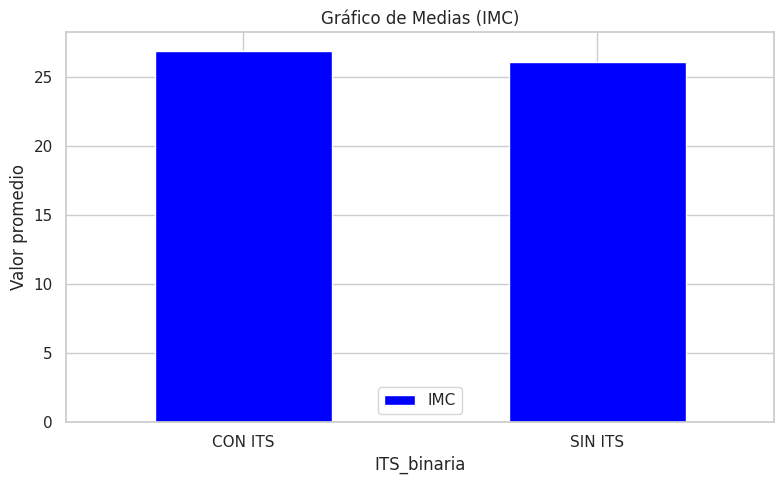

In [ ]:
media_df = df.groupby('ITS_binaria')[['IMC']].mean().reset_index()
media_df.plot(x='ITS_binaria', kind='bar', color='blue', figsize=(8,5))
plt.title('Gráfico de Medias (IMC)')
plt.ylabel('Valor promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

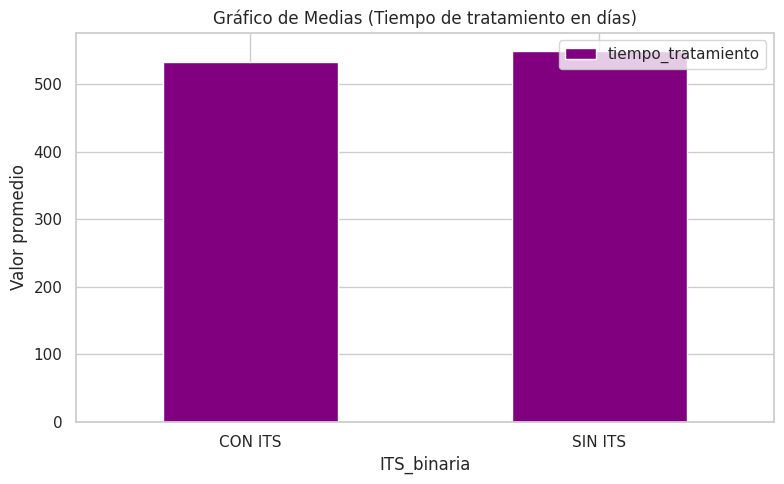

In [ ]:
media_df = df.groupby('ITS_binaria')[['tiempo_tratamiento']].mean().reset_index()
media_df.plot(x='ITS_binaria', kind='bar', color='purple', figsize=(8,5))
plt.title('Gráfico de Medias (Tiempo de tratamiento en días)')
plt.ylabel('Valor promedio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El análisis gráfico de medias reveló que los participantes con ITS presentaron un IMC promedio más alto (26.9 vs. 25.9) en comparación con aquellos sin ITS, mientras que la edad y el tiempo en PrEP fueron similares entre grupos. Esto sugiere que el IMC podría ser un factor relevante en la adquisición de ITS, independientemente de la duración del tratamiento.

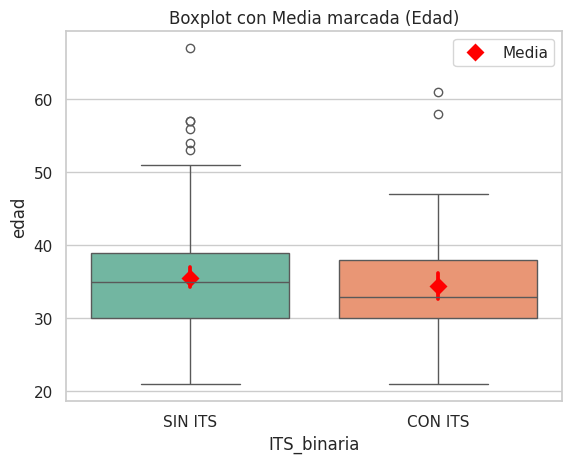

In [ ]:
sns.boxplot(data=df, x='ITS_binaria', y='edad', hue='ITS_binaria', palette='Set2', legend=False)
sns.pointplot(data=df, x='ITS_binaria', y='edad', estimator='mean', color='red', markers='D', linestyles='', label='Media')
plt.title('Boxplot con Media marcada (Edad)')
plt.show()

La distribución de edades en ambos grupos fue similar, con medianas cercanas a 34 años (CON ITS) y 35 años (SIN ITS). Las medias (indicadas por diamantes rojos en la Figura X) mostraron una ligera diferencia (34.4 vs. 35.6 años), pero dentro del rango intercuartílico, lo que sugiere que la edad no es un factor diferenciador clave en la presencia de ITS en esta cohorte.

Las personas con ITS tienen una edad promedio ligeramente mayor que aquellas sin ITS. Esto puede sugerir que, en este grupo, el riesgo de ITS aumenta con la edad, o que hay más exposición acumulada con el tiempo.



## Gráfico de Regresión (lmplot) para Relación Edad-IMC por Grupo de ITS

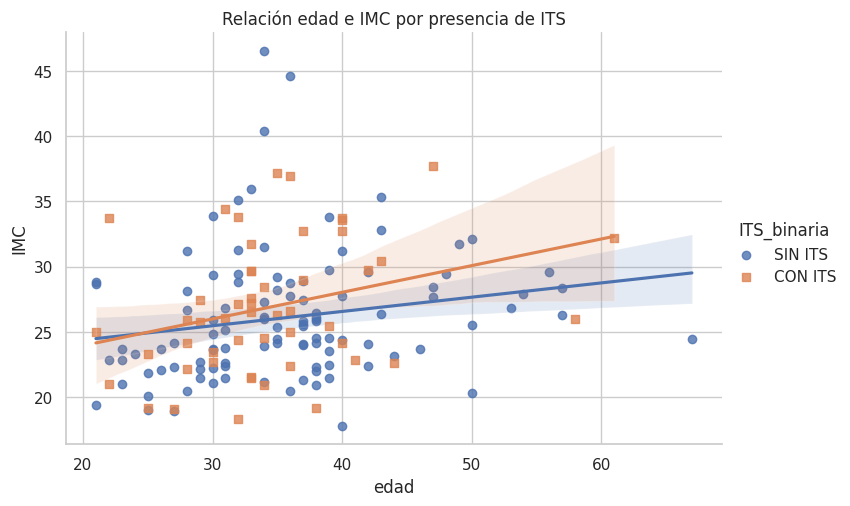

In [ ]:
sns.lmplot(data=df, x='edad', y='IMC', hue='ITS_binaria', markers=["o", "s"], aspect=1.5)
plt.title('Relación edad e IMC por presencia de ITS')
plt.show()

<ipython-input-17-55af10f58323>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  leyenda = [f'{etiquetas.get(cat)}: {porcentajes[i]:.1f}%' for i, cat in enumerate(conteo.index)]


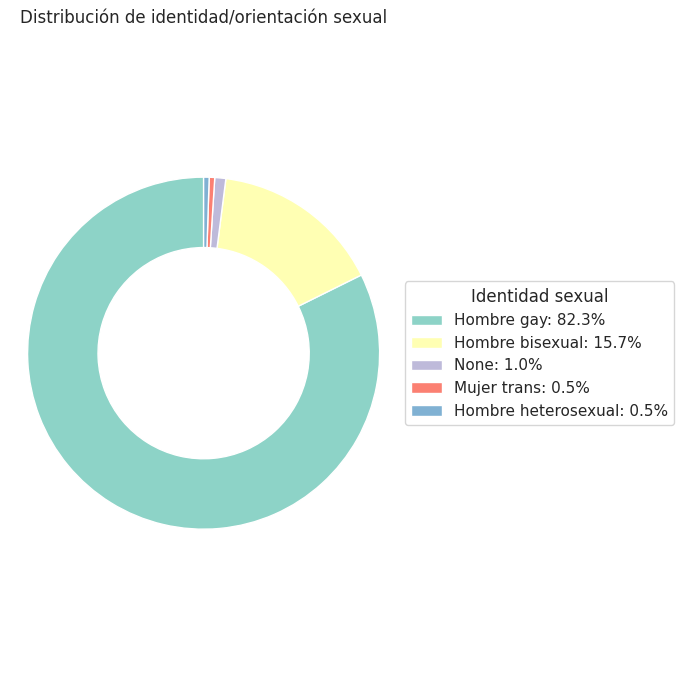

In [ ]:
conteo = df['IDESEX'].value_counts(dropna=True)

etiquetas = {
    'HG': 'Hombre gay',
    'HB': 'Hombre bisexual',
    'MT': 'Mujer trans',
    'HH': 'Hombre heterosexual'
}

labels = [etiquetas.get(i, i) for i in conteo.index]
colors = plt.cm.Set3.colors[:len(labels)]  # Colores suaves

plt.figure(figsize=(7, 7))
wedges, texts = plt.pie(
    conteo,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # estilo tipo dona
)

porcentajes = conteo / conteo.sum() * 100
leyenda = [f'{etiquetas.get(cat)}: {porcentajes[i]:.1f}%' for i, cat in enumerate(conteo.index)]

plt.legend(wedges, leyenda, title='Identidad sexual', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribución de identidad/orientación sexual')
plt.axis('equal')  # Circulo perfecto
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Diccionario para normalizar nombres de residencia
etiquetas = {
    'MONTERREY': 'Monterrey',
    'SANICOLAS DE LOS GARZA': 'San Nicolas',
    'SAN NICOLAS': 'San Nicolas',
    'SANICOLAS DE LOS GRAZA': 'San Nicolas',
    'GUADALUPE': 'Guadalupe',
    'GRAL. ESCOBEDO': 'Escobedo',
    'GRAN. ESCOBEDO': 'Escobedo',
    'ESCOBEDO': 'Escobedo',
    'SAN PEDRO DE LOS GARZA': 'San Pedro',
    'SAN PEDRO GARZAGARCIA': 'San Pedro',
    'SAN PEDRO GARZA GARCIA': 'San Pedro',
    'SAN PEDRO GARZA GARICA': 'San Pedro',
    'REYNOSA': 'Reynosa',
    'TAMAULIPAS': 'Tamaulipas',
    'GARCIA': 'García',
    'JUAREZ': 'Juarez',
    'SANTA CATARINA': 'Santa Catarina',
    'APODACA': 'Apodaca',
    'JALISCO': 'Jalisco',
    'MONTEMORELOS': 'Montemorelos',
    'COAHUILA': 'Coahuila',
    'SALINAS VICTORIA': 'Salinas Victoria',
    'PESQUERIA': 'Pesquería',
    'SANTIAGO': 'Santiago',
}

# Paso 1: Limpiar texto (quitar espacios y poner mayúsculas)
df['residencia_limpia'] = df['residencia'].str.upper().str.strip()

# Paso 2: Normalizar con el diccionario
df['residencia_normalizada'] = df['residencia_limpia'].map(etiquetas)

Para evitar errores por escritura distinta o inconsistente de los nombres de localidades, se estandarizan todos los valores de la columna residencia utilizando un diccionario de equivalencias. Esto mejora la calidad de los análisis al evitar duplicación de datos por errores tipográficos

<ipython-input-21-6b1e8ad3d92b>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  leyenda = [f'{cat}: {porcentajes[i]:.1f}%' for i, cat in enumerate(labels)]


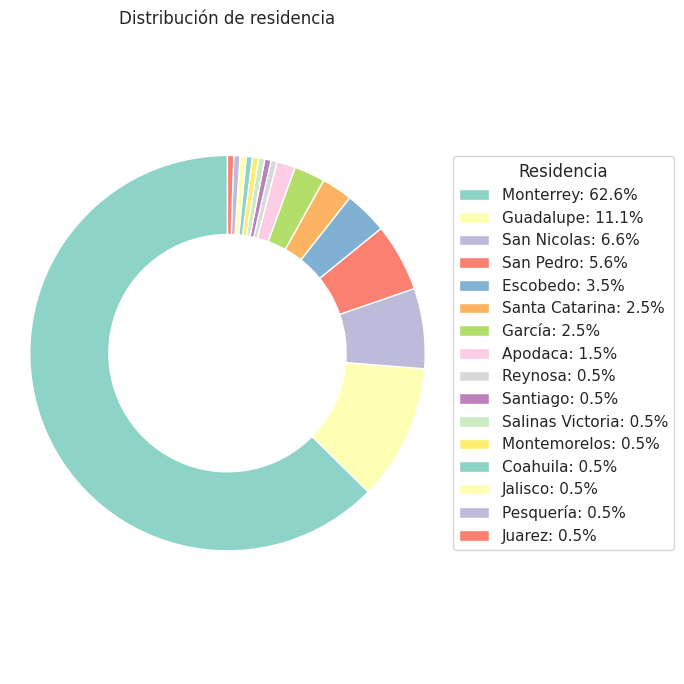

In [ ]:
# Paso 3: Conteo de frecuencias
conteo = df['residencia_normalizada'].value_counts(dropna=True)

# Paso 4: Preparar etiquetas y colores
labels = [etiquetas.get(i, i) for i in conteo.index]
colors = plt.cm.Set3.colors[:len(labels)]  # Colores suaves

# Paso 5: Graficar
plt.figure(figsize=(7, 7))
wedges, texts = plt.pie(
    conteo,
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # tipo dona
)

porcentajes = conteo / conteo.sum() * 100
leyenda = [f'{cat}: {porcentajes[i]:.1f}%' for i, cat in enumerate(labels)]

plt.legend(wedges, leyenda, title='Residencia', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Distribución de residencia')
plt.axis('equal')
plt.tight_layout()
plt.show()

El gráfico tipo dona muestra visualmente la proporción de personas por municipio o entidad de residencia. Esto permite identificar visualmente qué zonas concentran mayor participación en el estudio o intervención.
Por ejemplo, si Monterrey, San Nicolás o Guadalupe dominan la gráfica, esto puede reflejar la zona de influencia de la unidad médica o del programa.

## Análisis de Parejas Sexuales y su Relación con ITS

In [ ]:
df['parejas_sex>10'] = df['parejas >10'].replace({
    'parejas >10': 'Más de 10',
    'si': '10 o menos'
})

df['parejas_sex>10'] = df['parejas_sex>10'].fillna('No')

tabla_parejas_ITS = pd.crosstab(df['parejas_sex>10'], df['ITS_binaria'])
print(tabla_parejas_ITS)

ITS_binaria     CON ITS  SIN ITS
parejas_sex>10                  
No                   26       55
SD                    6       24
SI                   26       61


##  Gráfico de Barras Apiladas: Parejas Sexuales vs. ITS

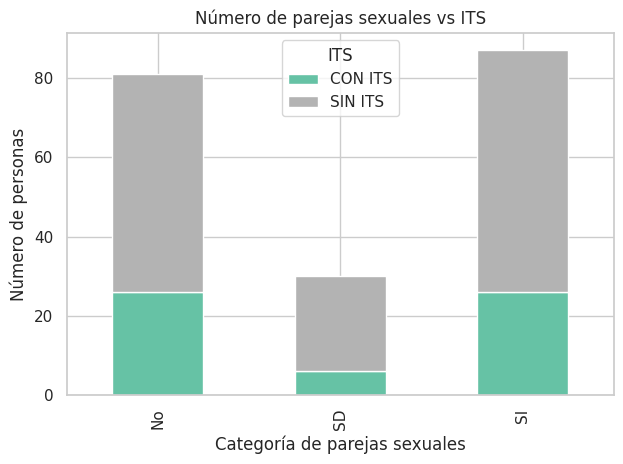

In [ ]:
tabla_parejas_ITS.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Número de parejas sexuales vs ITS')
plt.xlabel('Categoría de parejas sexuales')
plt.ylabel('Número de personas')
plt.legend(title='ITS')
plt.tight_layout()
plt.show()

## Análisis de Distribución para Variables Numéricas

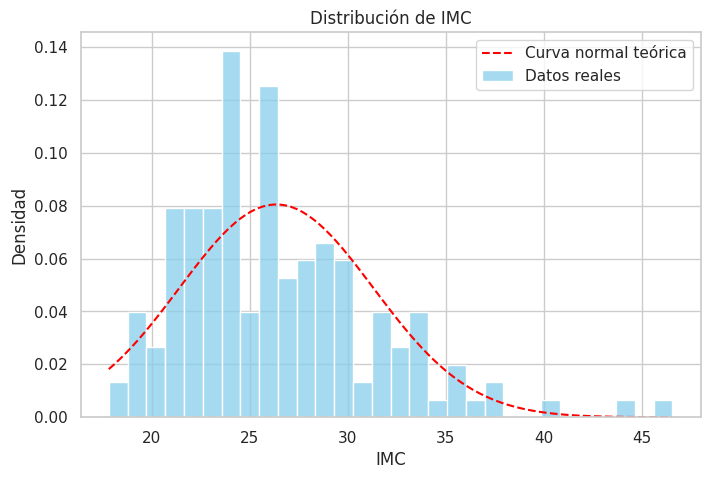

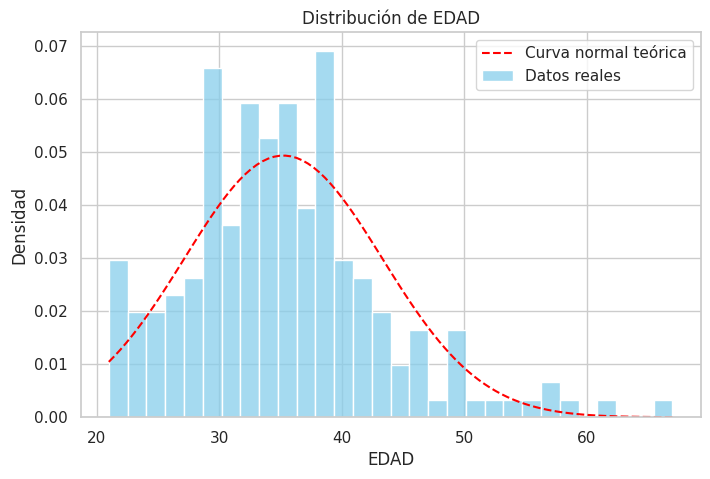

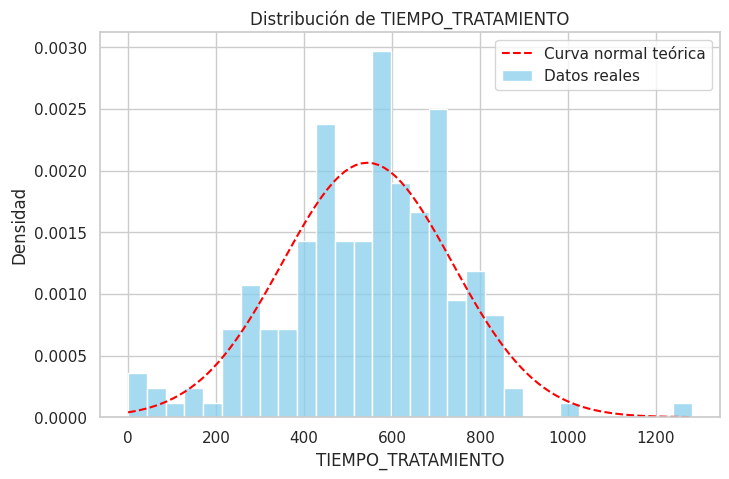

In [ ]:
import scipy.stats as stats
variables = ['IMC', 'edad', 'tiempo_tratamiento']

for var in variables:
    data = df[var].dropna()
    media = data.mean()
    std = data.std()

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=30, kde=False, stat='density', color='skyblue', label='Datos reales')

    x = np.linspace(data.min(), data.max(), 100)
    y = stats.norm.pdf(x, media, std)
    plt.plot(x, y, color='red', linestyle='--', label='Curva normal teórica')

    plt.title(f'Distribución de {var.upper()}')
    plt.xlabel(var.upper())
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
for var in variables:
    data = df[var].dropna()
    stat, p = stats.shapiro(data)
    print(f'{var.upper()} - Estadístico: {stat:.4f}, p-valor: {p:.4f}')
    if p > 0.05:
        print("→ Distribución normal (no se rechaza H0)\n")
    else:
        print("→ No es normal (se rechaza H0)\n")

IMC - Estadístico: 0.9360, p-valor: 0.0000
→ No es normal (se rechaza H0)

EDAD - Estadístico: 0.9551, p-valor: 0.0000
→ No es normal (se rechaza H0)

TIEMPO_TRATAMIENTO - Estadístico: 0.9810, p-valor: 0.0089
→ No es normal (se rechaza H0)



## Variables derivadas para análisis de asociación

In [ ]:
from scipy.stats import chi2_contingency

df['ADHERENCIA_CATEG'] = df['adherencia'].fillna('SIN DATO')
df['CHEMSEX_CATEG'] = df['chemsex'].fillna('NO')
df['CHEMSEX_CATEG'] = df['CHEMSEX_CATEG'].replace({'SI': 'SI', 'SD': 'SD', 'NO': 'NO'})

def clasificar_condon(valor):
    if valor in ['SIEMPRE', 'CASI SIEMPRE']:
        return 'CONSISTENTE'
    elif valor in ['CASI NUNCA', 'NUCA', 'NUNCA']:
        return 'INCONSISTENTE'
    else:
        return 'SD'

df['CONDON_CATEG'] = df['uso_condon'].apply(clasificar_condon)

def categorizar_imc(imc):
    if pd.isna(imc):
        return 'SD'
    elif imc < 18.5:
        return 'BAJO PESO'
    elif 18.5 <= imc < 25:
        return 'NORMAL'
    elif 25 <= imc < 30:
        return 'SOBREPESO'
    else:
        return 'OBESIDAD'

df['IMC_CATEG'] = df['IMC'].apply(categorizar_imc)

## Función de prueba de independencia (Chi-cuadrado)

Se definió una función prueba_chi() que automatiza la ejecución de la prueba chi-cuadrado de independencia entre dos variables categóricas. Esta función genera:

- Tabla de contingencia.

- Estadístico Chi².

- Grados de libertad (gl).

- Valor p.
Además, interpreta automáticamente si hay asociación significativa con base en un umbral de significancia de 0.05.

In [ ]:
from tabulate import tabulate

def prueba_chi(var1, var2, nombre1, nombre2):
    tabla = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(tabla)

    print(f"\n Chi-cuadrada entre {nombre1} y {nombre2}")
    print("Tabla de contingencia:")
    print(tabulate(tabla, headers='keys', tablefmt='grid'))

    print(f"\nChi2 = {chi2:.4f}, p-valor = {p:.4f}, gl = {dof}")
    if p < 0.05:
        print("Hay asociación significativa.\n")
    else:
        print("No hay asociación significativa.\n")

prueba_chi('ADHERENCIA_CATEG', 'IMC_CATEG', 'Adherencia', 'IMC')


 Chi-cuadrada entre Adherencia y IMC
Tabla de contingencia:
+--------------------+-------------+----------+------------+------+-------------+
| ADHERENCIA_CATEG   |   BAJO PESO |   NORMAL |   OBESIDAD |   SD |   SOBREPESO |
+====================+=============+==========+============+======+=============+
| 94 - 70%           |           1 |        6 |          4 |    5 |           8 |
+--------------------+-------------+----------+------------+------+-------------+
| >95%               |           1 |       61 |         23 |   30 |          45 |
+--------------------+-------------+----------+------------+------+-------------+
| SIN DATO           |           0 |        4 |          1 |    5 |           4 |
+--------------------+-------------+----------+------------+------+-------------+

Chi2 = 6.6049, p-valor = 0.5798, gl = 8
No hay asociación significativa.



In [ ]:
prueba_chi('ADHERENCIA_CATEG', 'CHEMSEX_CATEG', 'Adherencia', 'Chemsex')


 Chi-cuadrada entre Adherencia y Chemsex
Tabla de contingencia:
+--------------------+------+------+------+
| ADHERENCIA_CATEG   |   NO |   SD |   SI |
+====================+======+======+======+
| 94 - 70%           |   11 |    4 |    9 |
+--------------------+------+------+------+
| >95%               |   97 |   27 |   36 |
+--------------------+------+------+------+
| SIN DATO           |    7 |    5 |    2 |
+--------------------+------+------+------+

Chi2 = 6.0482, p-valor = 0.1956, gl = 4
No hay asociación significativa.



In [ ]:
prueba_chi('ADHERENCIA_CATEG', 'CONDON_CATEG', 'Adherencia', 'Uso de Condón')


 Chi-cuadrada entre Adherencia y Uso de Condón
Tabla de contingencia:
+--------------------+---------------+-----------------+------+
| ADHERENCIA_CATEG   |   CONSISTENTE |   INCONSISTENTE |   SD |
+====================+===============+=================+======+
| 94 - 70%           |             7 |              15 |    2 |
+--------------------+---------------+-----------------+------+
| >95%               |            40 |             117 |    3 |
+--------------------+---------------+-----------------+------+
| SIN DATO           |             6 |               4 |    4 |
+--------------------+---------------+-----------------+------+

Chi2 = 26.5119, p-valor = 0.0000, gl = 4
Hay asociación significativa.



A diferencia de las dos tablas de contingencia anteriores, en este caso el valor p es significativamente menor a 0.05.
POr lo que, **Sí** existe una asociación estadísticamente significativa entre la adherencia al PrEP y el uso del condón.

Para visualizar la relación entre la variable de adherencia al PrEP (ADHERENCIA_CATEG) y otra variable categórica de interés (IMC_CATEG, CHEMSEX_CATEG, CONDON_CATEG, etc.), mediante una gráfica de barras apiladas normalizada por fila, es decir, expresada en porcentajes, se realizó lo siguiente:

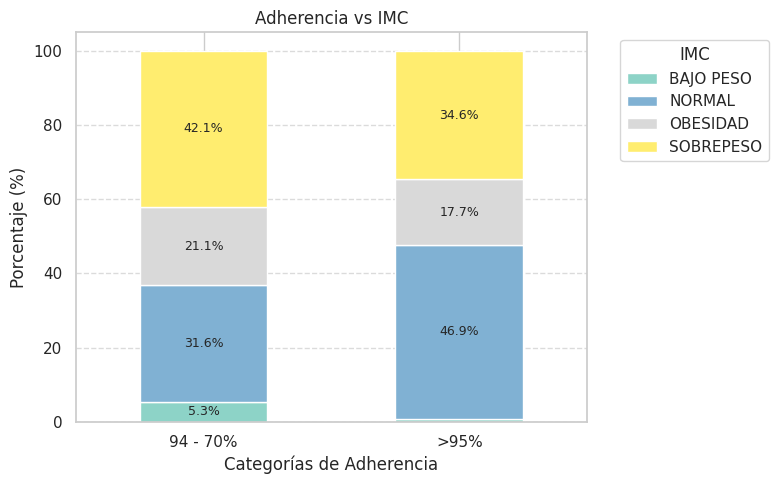

In [ ]:
def graficar_barras_apiladas(var_cat, nombre_variable):
    df_filtrado = df[(df[var_cat] != 'SD') & (df['ADHERENCIA_CATEG'] != 'SIN DATO')]
    tabla = pd.crosstab(df_filtrado['ADHERENCIA_CATEG'], df_filtrado[var_cat], normalize='index') * 100  # %

    ax = tabla.plot(kind='bar', stacked=True, colormap='Set3', figsize=(8,5))

    for i, (index, row) in enumerate(tabla.iterrows()):
        cumulative = 0
        for j, value in enumerate(row):
            if value > 3:
                ax.text(
                    i,
                    cumulative + value / 2,
                    f'{value:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=9
                )
            cumulative += value

    plt.title(f'Adherencia vs {nombre_variable}')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('Categorías de Adherencia')
    plt.xticks(rotation=0)
    plt.legend(title=nombre_variable, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

graficar_barras_apiladas('IMC_CATEG', 'IMC')

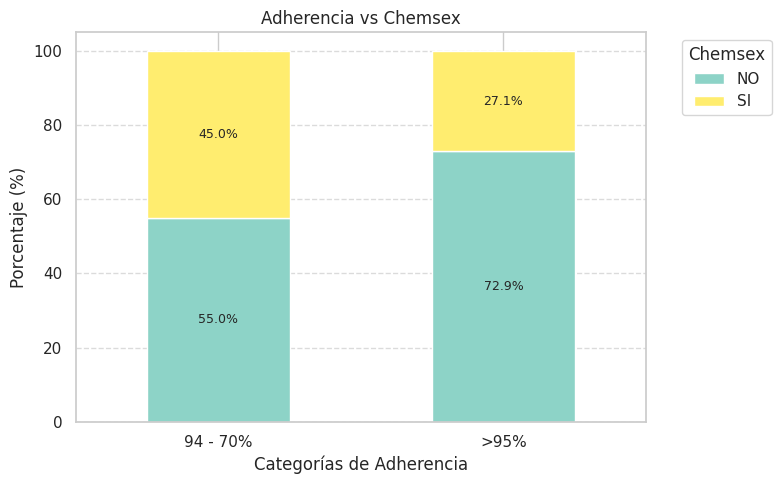

In [ ]:
graficar_barras_apiladas('CHEMSEX_CATEG', 'Chemsex')

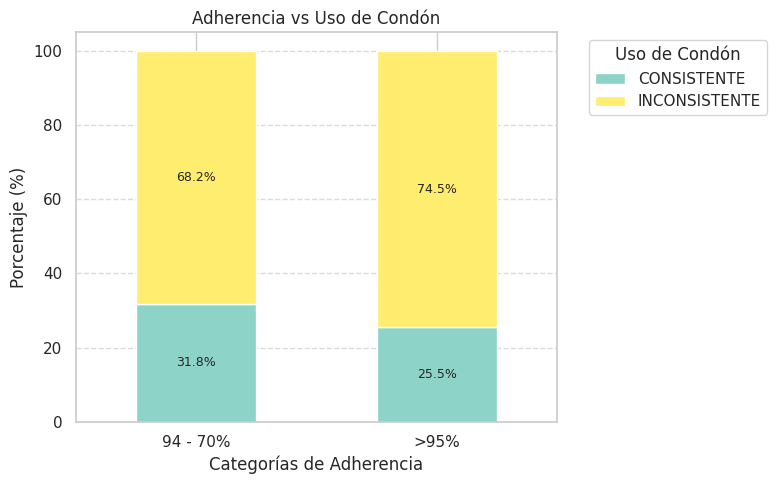

In [ ]:
graficar_barras_apiladas('CONDON_CATEG', 'Uso de Condón')